# Sobel Example

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# function to keep the valid part after convolution 
def am_valid_part(a,N):
    cff = int(N/2)
    M = a.shape
    if len(M)==3:
        return a[cff:M[0]-cff, cff:M[1]-cff, :]
    else:
        return a[cff:M[0]-cff, cff:M[1]-cff]

In [3]:
image = cv2.imread('..\\20220801_183844.jpg')
#
# Print error message if image is nul
# thr decides edges that we wanna keep in the final output. edges stronger than thr*maximum_strength would be kept. 
# e.g., thr = 0.7, edgest with strength higher than 0.7*maximum_strength would be kept
thr = 0.5
if image is None:
    print('Could not read image') 
    
# define the filter kernels 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsx = np.array([[-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]])
hsy = np.array([[-1 , -2 , -1] , [0 , 0 , 0] , [1 , 2 , 1]])


In [4]:
## how to use?
## cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	) ->	dst


In [5]:
# horizontal and vertical edge detection
Gx = cv2.filter2D(src=image, ddepth=-1, kernel=hsx)
Gy = cv2.filter2D(src=image, ddepth=-1, kernel=hsy)
Gx = am_valid_part(Gx,3)
Gy = am_valid_part(Gy,3)

# showing the results
cv2.namedWindow("Original", cv2.WINDOW_NORMAL)
cv2.imshow('Original', image)
cv2.namedWindow("Gx", cv2.WINDOW_NORMAL)
cv2.imshow('Gx', Gx)
cv2.namedWindow("Gy", cv2.WINDOW_NORMAL)
cv2.imshow('Gy', Gy)
cv2.waitKey()


32

In [6]:
# computing the edge strength and direction matrices
# Gabs = np.power((np.power(Gx,2) + np.power(Gy,2)) , 0.5)
Gabs = (np.abs(Gx) + np.abs(Gy)) / 2 
Gdir = np.arctan(np.divide(Gy,(Gx+0.000001))) 


In [7]:

cv2.namedWindow("GABS", cv2.WINDOW_NORMAL)
cv2.imshow('GABS', np.uint8(Gabs))

In [8]:
M=Gabs.shape
print(Gabs)

[[ 5.   6.5  3.  ...  0.   0.   6.5]
 [10.  10.   2.5 ...  0.   0.   9. ]
 [ 2.   3.   1.5 ...  0.   2.5  9. ]
 ...
 [ 0.   0.   2.  ... 16.   8.   7.5]
 [ 0.   0.   3.  ... 22.  12.   5. ]
 [ 0.   0.5  3.  ... 20.  10.   1.5]]


In [9]:
''' 
# 3d plot of edge strength
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
# Surface Plot
#ax.plot_surface(M[0], M[1], Gabs, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.scatter3D

ax = plt.axes(projection='3d')
ax.scatter3D(M[0], M[1], Gabs, c=Gabs, cmap='Greens');

ax = plt.axes(projection='3d')
ax.plot_surface(M[0], M[1], Gabs, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none') '''

" \n# 3d plot of edge strength\nfig = plt.figure(figsize=(12,10))\nax = fig.add_subplot(111, projection='3d')\n# Surface Plot\n#ax.plot_surface(M[0], M[1], Gabs, rstride=1, cstride=1, cmap='viridis', edgecolor='none')\nax.scatter3D\n\nax = plt.axes(projection='3d')\nax.scatter3D(M[0], M[1], Gabs, c=Gabs, cmap='Greens');\n\nax = plt.axes(projection='3d')\nax.plot_surface(M[0], M[1], Gabs, rstride=1, cstride=1,\n                cmap='viridis', edgecolor='none') "

In [10]:
print(Gdir)

[[0.24497863 0.         0.         ... 0.         0.         0.        ]
 [1.3258176  0.88506676 1.57079613 ... 0.         0.         0.        ]
 [0.32175045 0.19739552 1.57079599 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.14189704 1.57079626]
 [0.         0.         0.         ... 0.28605143 0.39060702 1.57079623]
 [0.         1.57079533 0.46364751 ... 0.32175054 0.40489176 1.57079599]]


In [11]:
# applyiing a threshold on the edge strength matrix, using the thr parameter and the maximum strength of edges
thr = np.max(Gabs) * thr
abs_thr = (Gabs >= thr)
print(abs_thr)
Gabs2 = np.multiply( Gabs , np.uint8(abs_thr)) 

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [12]:
print(Gabs2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
print('Number of pixels left on strong edges=', np.sum(abs_thr))
# showing the outcome as a binary image
abs_thr= np.uint8(abs_thr * 200)
cv2.namedWindow("edges threshold", cv2.WINDOW_NORMAL)
cv2.imshow('edges threshold', abs_thr)
cv2.namedWindow("edges thr mul", cv2.WINDOW_NORMAL)
cv2.imshow('edges thr mul', Gabs2)


Number of pixels left on strong edges= 277002


In [14]:
'''fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M[0], M[1], abs_thr, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none') 
                ''' 

"fig = plt.figure(figsize=(12,10))\nax = fig.add_subplot(111, projection='3d')\nax.plot_surface(M[0], M[1], abs_thr, rstride=1, cstride=1,\n                cmap='viridis', edgecolor='none') \n                "

In [15]:
cv2.waitKey()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Edges after Thresholding')

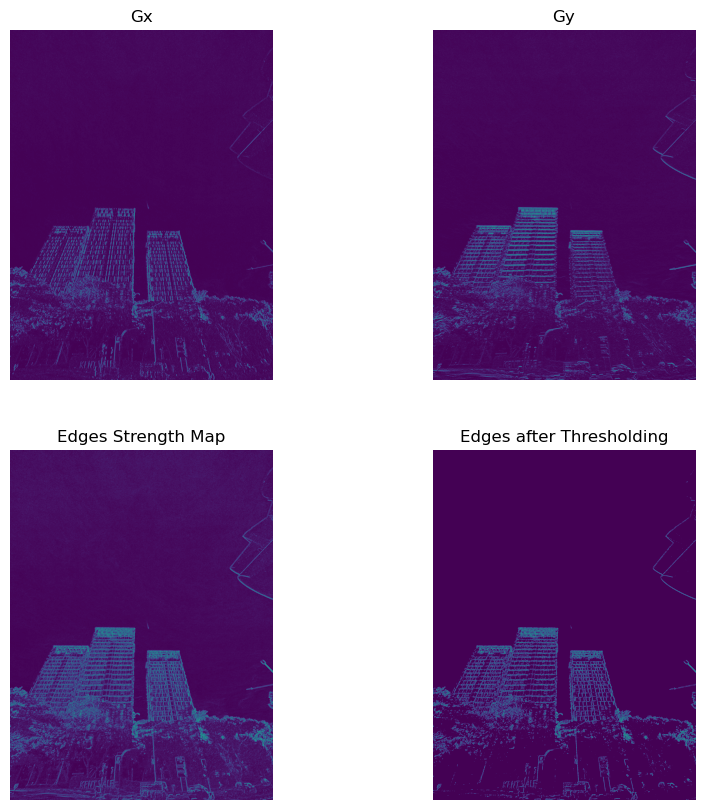

In [16]:
# create figure
fig = plt.figure(figsize=(10,10))

# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Gx)
plt.axis('off')
plt.title("Gx")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Gy)
plt.axis('off')
plt.title("Gy")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Gabs)
plt.axis('off')
plt.title("Edges Strength Map")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(abs_thr)
plt.axis('off')
plt.title("Edges after Thresholding")
